<a href="https://colab.research.google.com/github/JosenildoJunior/StatPyDataScience/blob/main/Estat%C3%ADstica_descritiva_EBA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introdução à Estatística Descritiva**

A Estatística Descritiva é uma área fundamental da estatística que se concentra na organização, resumo e interpretação de dados. Ela busca extrair informações úteis e compreensíveis a partir de conjuntos de dados, permitindo uma análise mais eficaz e uma compreensão mais profunda dos fenômenos estudados.

## **Carregando os dados**

Vamos realizar a importação dos dados para que possamos aplicar diferentes tecnicas da estatistica descritiva

In [1]:
# Acesso ao drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Manipulação de dados
import pandas as pd

# Algébra linear
import numpy as np

# Visualização de dados
import matplotlib.pyplot as plt
import seaborn as sns

# Funções estatísticas
import statistics
import scipy.stats

Agora que já importamos todas as bibliotecas necessarias vamos importar a base de dados propriamente dita

In [14]:
# Importando o dataset
df = pd.read_csv('/content/drive/MyDrive/Estatística para ciência de dados/house_price.csv')

Agora que já carregamos a base de dados vamos ter um primeiro contato com esses dados

In [4]:
# Observando os primeiros registros
df.head()

,Unnamed: 0,SalePrice,OverallQual,OverallCond,BedroomAbvGr,TotRmsAbvGrd,GrLivArea,TotalBsmtSF,YearBuilt,MSZoning,Utilities,BldgType
0,0,208500,7,5,3,8,1710,856,2003,RL,AllPub,1Fam
1,1,181500,6,8,3,6,1262,1262,1976,RL,AllPub,1Fam
2,2,223500,7,5,3,6,1786,920,2001,RL,AllPub,1Fam
3,3,140000,7,5,3,7,1717,756,1915,RL,AllPub,1Fam
4,4,250000,8,5,4,9,2198,1145,2000,RL,AllPub,1Fam


Vemos diversas variaveis aqui, que até o momento não sabemos do que se trata então vamos observar o dicionario de dados

- SalePrice: Price of sale
- OverallQual: Rates the overall material and finish of the house
- OverallCond: Rates the overall condition of the house
- BedroomAbvGr: Bedrooms above grade (does NOT include basement bedrooms)
- TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
- GrLivArea: Above grade (ground) living area square feet
- TotalBsmtSF: Total square feet of basement area

- YearBuilt: Original construction date

- MSZoning - Identifies the general zoning classification of the sale
  - A    Agriculture
  - C    Commercial
  - FV    Floating Village Residential
  - I     Industrial
  - RH    Residential High Density
  - RL    Residential Low Density
  - RP    Residential Low Density Park
  - RM    Residential Medium Density

- Utilities: Type of utilities available
 - AllPub    All public Utilities (E,G,W,& S)    
 - NoSewr    Electricity, Gas, and Water (Septic Tank)
 - NoSeWa    Electricity and Gas Only
 - ELO       Electricity only    

- BldgType: Type of dwelling
 - 1Fam      Single-family Detached    
 - 2FmCon    Two-family Conversion; originally built as one-family dwelling
 - Duplx     Duplex
 - TwnhsE    Townhouse End Unit
 - TwnhsI    Townhouse Inside Unit

## **Medidas de Tendência Central**

- Média: Representa o valor médio de um conjunto de dados.
- Mediana: O valor que divide o conjunto de dados ao meio quando ordenado.
- Moda: O valor mais frequente em um conjunto de dados.

Vamos observar como conseguir cada uma dessas medidas, mas antes, vamos observar novamente como estão nossos dados.

In [ ]:
# Observando os primeiros registros
df.head()

,Unnamed: 0,SalePrice,OverallQual,OverallCond,BedroomAbvGr,TotRmsAbvGrd,GrLivArea,TotalBsmtSF,YearBuilt,MSZoning,Utilities,BldgType
0,0,208500,7,5,3,8,1710,856,2003,RL,AllPub,1Fam
1,1,181500,6,8,3,6,1262,1262,1976,RL,AllPub,1Fam
2,2,223500,7,5,3,6,1786,920,2001,RL,AllPub,1Fam
3,3,140000,7,5,3,7,1717,756,1915,RL,AllPub,1Fam
4,4,250000,8,5,4,9,2198,1145,2000,RL,AllPub,1Fam


Vamos observar a média, mediana e moda da variável 'SalePrice'

In [ ]:
# Calculando a média
mean = df['SalePrice'].mean()

# Calculando a mediana
median = df['SalePrice'].median()

# Calculando a moda
mode = df['SalePrice'].mode()

print(f"Média: {mean}\nMediana: {median}\nModa {mode}")

Média: 180921.19589041095
Mediana: 163000.0
Moda 0    140000
Name: SalePrice, dtype: int64


Dessa forma, podemos perceber que a média do preço de venda foi de 180k, enquanto a mediana é de 163k. Isso pode indicar que os dados não estão muito assimétricos; provavelmente existiram algumas poucas vendas com valores mais altos, o que está consequentemente elevando a média. Vamos observar isso mais a fundo.

## **Medidas de Posição Relativa**

- **Percentis:** Dividem os dados em percentagens, indicando a posição relativa de um valor.

  - 25º percentil: 25% dos dados são menores que ou iguais a este valor.

  - 50º percentil: A mediana. 50% dos dados são menores que ou iguais a este valor.

  - 75º percentil: 75% dos dados são menores que ou iguais a este valor.


- **Quartis:** Dividem os dados em quatro partes iguais, fornecendo informações sobre a dispersão.

  - 1º quartil (Q1):	25% dos dados são menores que ou iguais a este valor.

  - 2º quartil (Q2):	A mediana. 50% dos dados são menores que ou iguais a este valor.

  - 3º quartil (Q3):	75% dos dados são menores que ou iguais a este valor.

Vamos utilizar o boxplot para investigarmos os quartis.

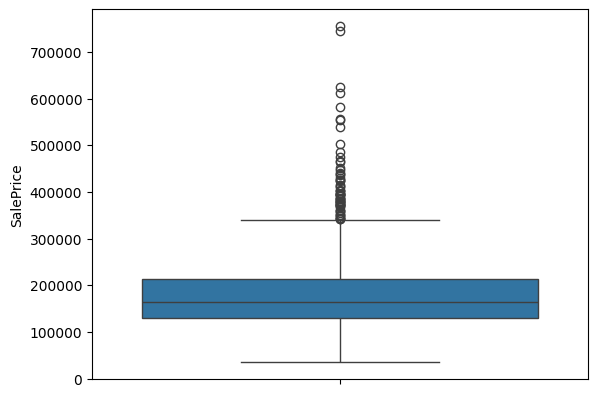

In [ ]:
# Criando o boxplot
sns.boxplot(df['SalePrice']);

Com esse gráfico, podemos confirmar nossa suspeita de que aquela disparidade entre a média e a mediana deve-se a outliers que estão fazendo com que a média aumente. Vamos observar mais algumas medidas.

In [ ]:
# Observando algumas medidas
df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

Podemos observar neste momento que existem casas sendo vendidas a 34k, enquanto outras estão sendo vendidas a 755k, indicando assim uma alta amplitude. Logo, podemos observar uma maior variação nos preços de venda.

## **Hipóteses**

Agora vamos imaginar a seguinte pergunta: O que faz uma casa ser vendida cara ou barata ?

Para respondermos a essa pergunta, será necessário realizar uma análise um pouco mais minuciosa a respeito das diferentes colunas dos dados. Vamos, então, separar os dados entre dados numéricos e categóricos.

Das variáveis **numéricas**, podemos pensar em algumas hipóteses:

1.   A média/mediana da qualidade do imóvel é superior para os apartamentos mais caros
2.   A média/mediana da quantidade de cômodos/quartos/área/banheiros é maior em apartamentos mais caros
3.   Os apartamentos mais caros são mais antigos

Das variáveis **categóricas**, podemos pensar em algumas hipóteses:
4.   Existe diferença de preço de acordo com sua localização (zona)
5.   As utilidades (gás, água, etc) existentes na casa tem influência no preço
6.   O tipo de habitação influencia o preço (duplex, condomínio, etc)


Agora, precisamos validar se essas hipóteses são verdadeiras ou não com dados.


### **Númericas**

Vamos observar um panorama geral dos dados.

In [ ]:
# Panorama geral
df.describe()

,Unnamed: 0,SalePrice,OverallQual,OverallCond,BedroomAbvGr,TotRmsAbvGrd,GrLivArea,TotalBsmtSF,YearBuilt
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,729.500000,180921.195890,6.099315,5.575342,2.866438,6.517808,1515.463699,1057.429452,1971.267808
std,421.610009,79442.502883,1.382997,1.112799,0.815778,1.625393,525.480383,438.705324,30.202904
min,0.000000,34900.000000,1.000000,1.000000,0.000000,2.000000,334.000000,0.000000,1872.000000
25%,364.750000,129975.000000,5.000000,5.000000,2.000000,5.000000,1129.500000,795.750000,1954.000000
50%,729.500000,163000.000000,6.000000,5.000000,3.000000,6.000000,1464.000000,991.500000,1973.000000
75%,1094.250000,214000.000000,7.000000,6.000000,3.000000,7.000000,1776.750000,1298.250000,2000.000000
max,1459.000000,755000.000000,10.000000,9.000000,8.000000,14.000000,5642.000000,6110.000000,2010.000000


Para validarmos nossas hipóteses, será necessário a criação de colunas para identificarmos se uma casa é ou não cara. Para isso, utilizaremos o valor do 3º quartil, que neste caso é 214K. Valores acima desse serão considerados caros e abaixo serão considerados baratos.

In [ ]:
# Criando a nova coluna
df['categoria_preco'] = np.where(df['SalePrice']>214000, "cara", "barata")

Dessa forma, estamos armazenando em uma nova coluna todos os dados em que o preço de venda seja maior que 214k. Sendo maior que esse valor, a casa será classificada como cara, e abaixo desse valor será considerada como barata.

In [ ]:
# Observando os dados
df.head()

,Unnamed: 0,SalePrice,OverallQual,OverallCond,BedroomAbvGr,TotRmsAbvGrd,GrLivArea,TotalBsmtSF,YearBuilt,MSZoning,Utilities,BldgType,categoria_preco
0,0,208500,7,5,3,8,1710,856,2003,RL,AllPub,1Fam,barata
1,1,181500,6,8,3,6,1262,1262,1976,RL,AllPub,1Fam,barata
2,2,223500,7,5,3,6,1786,920,2001,RL,AllPub,1Fam,cara
3,3,140000,7,5,3,7,1717,756,1915,RL,AllPub,1Fam,barata
4,4,250000,8,5,4,9,2198,1145,2000,RL,AllPub,1Fam,cara


Como podemos observar, os dados já estão classificados como caro ou barato, dependendo do valor que declaramos anteriormente.

#### Agora vamos observar mais a fundo a seguinte hipótese: **A média/mediana da qualidade do imóvel é superior para os apartamentos mais caros.**

In [ ]:
# Agrupando os dados e observando a média
df.groupby("categoria_preco")["OverallQual"].mean()

categoria_preco
barata    5.588342
cara      7.649171
Name: OverallQual, dtype: float64

Dessa forma, estamos agrupando os dados pela coluna 'categoria_preco' e a nota da qualidade do material da casa, observando a média para cada uma das categorias. Podemos notar que as categorias apresentam diferentes médias. Vamos observar um pouco mais a fundo essa situação.

Observando a mediana.

In [ ]:
# Agrupando os dados e observando a mediana
df.groupby("categoria_preco")["OverallQual"].median()

categoria_preco
barata    6.0
cara      8.0
Name: OverallQual, dtype: float64

Vamos observar um boxplot dessas colunas.

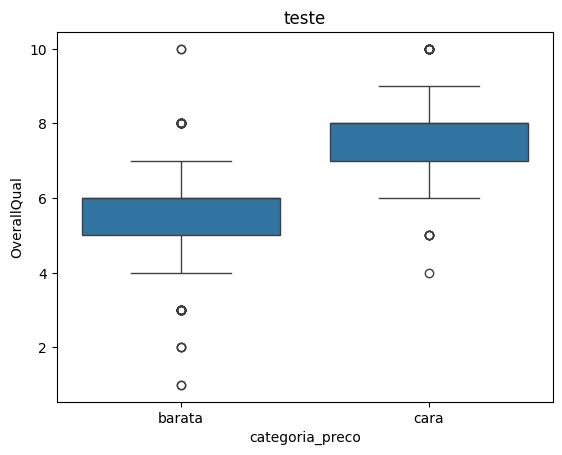

In [ ]:
# Criando o boxplot
sns.boxplot(data = df, x = "categoria_preco", y = "OverallQual")
plt.title("Preço x OverallQual");

- Observamos diferenças entre as médias das casas caras e a média das casas baratas, o mesmo se aplica à mediana.

- As casas caras apresentam tanto a média quanto a mediana maior que as casas baratas, ou seja, até o momento, as casas caras realmente apresentam uma qualidade melhor no material.

Porém, ainda não podemos concluir isso com 100% de certeza, pois podemos observar que o limite inferior das casas caras está no mesmo valor que o 3° quartil das casas baratas, e o limite superior das casas baratas está no 1º quartil das casas caras. Ou seja, nesse intervalo, tanto as casas baratas quanto as casas caras possuem a mesma qualidade. Dessa forma, mesmo que a média, mediana e o distanciamento do boxplot indiquem que as casas mais caras realmente apresentam uma melhor qualidade, não podemos afirmar com 100% de certeza devido a essa situação. Para a resolução dessa problemática, seria necessária a realização de um teste de hipótese para comprovar se realmente existe uma diferença de média.

Vamos observar a média das casas com a coluna nota geral da casa.

In [ ]:
# Agrupando os dados e observando a média
df.groupby("categoria_preco")["OverallCond"].mean()

categoria_preco
barata    5.631148
cara      5.406077
Name: OverallCond, dtype: float64

Observando a mediana.

In [ ]:
# Agrupando os dados e observando a mediana
df.groupby("categoria_preco")["OverallCond"].median()

categoria_preco
barata    5.0
cara      5.0
Name: OverallCond, dtype: float64

Agora vamos observar o boxplot.

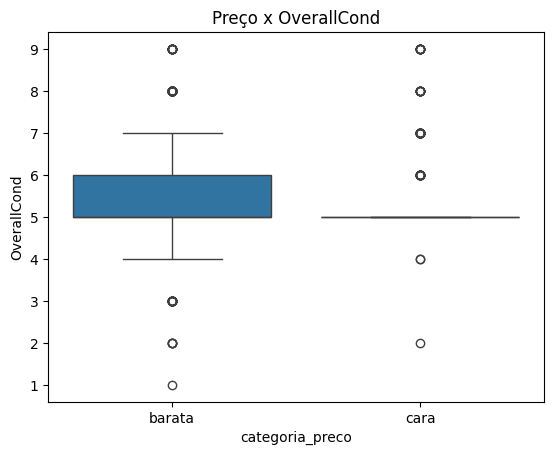

In [ ]:
# Criando o boxplot
sns.boxplot(data = df, x = "categoria_preco", y = "OverallCond")
plt.title("Preço x OverallCond");

Podemos observar que, nesse caso, o boxplot das casas caras adquiriu um formato esquisito. Como vimos anteriormente, a média não está se distanciando muito uma da outra, e a mediana é exatamente a mesma. Vamos tentar investigar o motivo pelo qual esse boxplot está com essa forma estranha.

In [ ]:
# Observando os registros presentes na coluna OverllCond
df[df['categoria_preco'] == 'cara'].OverallCond.value_counts()

5    284
7     32
6     25
8      9
9      9
4      2
2      1
Name: OverallCond, dtype: int64

Com esse código, podemos observar quais os valores estão presentes na variável 'OverallCond' quando a casa é considerada cara. Logo, podemos notar que existem 284 notas 5 e poucos valores das outras notas, por isso o boxplot está com aquele formato estranho.

Nesse caso, temos duas opções:

- O pessoal que deu as notas para essas casas não levou esse critério muito a sério e acabou dando notas um pouco displicentes.

- A condição das casas, sejam elas caras ou baratas, não muda tanto e estão praticamente no mesmo patamar nesse quesito, já que a média é bem próxima e a mediana é igual.

**Conclusão**

As casas caras apresentam uma média e mediana maiores que as casas baratas. Aparentemente, as casas caras realmente apresentam uma qualidade melhor no material. No entanto, detectamos sobreposição entre os boxplots. Para termos 100% de certeza, seria necessário um teste de hipótese.

Ao observarmos as notas gerais para as casas, podemos perceber que a média está bem próxima e a mediana é a mesma, indicando que talvez as casas estejam bem semelhantes nesses pontos. Logo, essa característica não é muito relevante para sabermos o motivo de uma casa estar sendo vendida cara ou barata.

#### Vamos observar mais a fundo a seguinte hipótese: **A média/mediana da quantidade de cômodos/quartos/porão/área é maior em apartamentos mais caros.**

Vamos partir para a próxima variável.

In [ ]:
# Agrupando os dados e observando a média
df.groupby("categoria_preco")["TotRmsAbvGrd"].mean()

categoria_preco
barata    6.122951
cara      7.715470
Name: TotRmsAbvGrd, dtype: float64

In [ ]:
# Agrupando os dados e observando a mediana
df.groupby("categoria_preco")["TotRmsAbvGrd"].median()

categoria_preco
barata    6.0
cara      8.0
Name: TotRmsAbvGrd, dtype: float64

Vamos observar o boxplot.

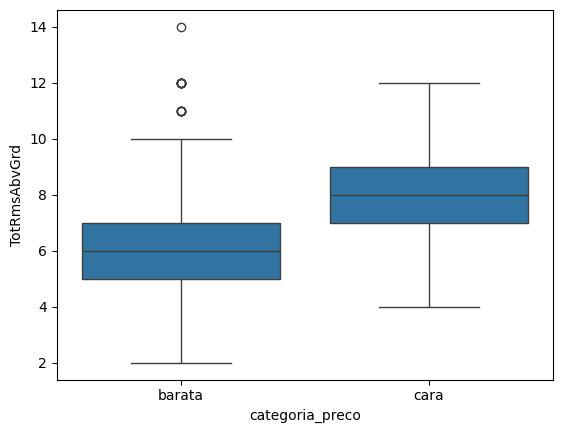

In [ ]:
# Criando o boxplot
sns.boxplot(data = df, x = "categoria_preco", y = "TotRmsAbvGrd")
plt.title("Preço x TotRmsAbvGrd");

Essa variável se trata do total de cômodos acima do solo. Podemos observar que as casas caras apresentam tanto média quanto mediana maior que as casas baratas, além de um claro deslocamento do boxplot. No entanto, ainda assim, podemos observar que nesse caso novamente existe meio que uma sobreposição dos boxplots. Para realmente termos 100% de certeza se essas médias são realmente diferentes, seria necessário a realização de um teste de hipótese.

Vamos partir para a próxima variável.

In [ ]:
# Agrupando os dados e observando a média
df.groupby("categoria_preco")["GrLivArea"].mean()

categoria_preco
barata    1342.642077
cara      2039.657459
Name: GrLivArea, dtype: float64

In [ ]:
# Agrupando os dados e observando a mediana
df.groupby("categoria_preco")["GrLivArea"].median()

categoria_preco
barata    1308.5
cara      1956.0
Name: GrLivArea, dtype: float64

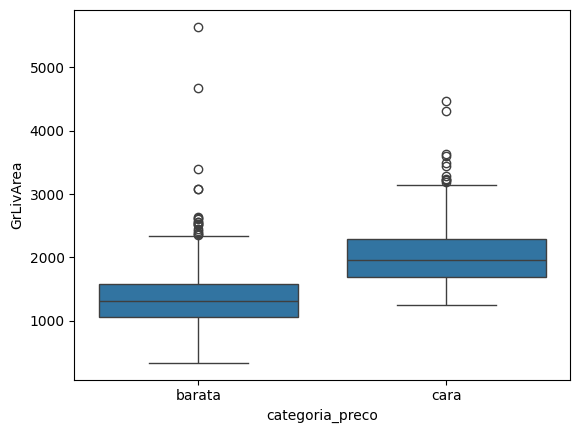

In [ ]:
# Criando o boxplot
sns.boxplot(data = df, x = "categoria_preco", y = "GrLivArea")
plt.title("Preço x GrLivArea");

Observando a área das casas, encontramos uma média e mediana maior nas casas mais caras. No entanto, novamente encontramos uma sobreposição, onde existem tanto casas caras quanto casas baratas apresentando uma área igual. Provavelmente, se tivéssemos mais alguma variável em conjunto com essa das áreas, poderíamos explicar um pouco mais a respeito dos valores das casas. Mas se quisermos utilizar apenas essa variável, novamente se faz necessário o teste de hipóteses.

Oservando outra variável.



In [ ]:
# Agrupando os dados e observando a média
df.groupby("categoria_preco")["TotalBsmtSF"].mean()

categoria_preco
barata     936.475410
cara      1424.301105
Name: TotalBsmtSF, dtype: float64

In [ ]:
# Agrupando os dados e observando a mediana
df.groupby("categoria_preco")["TotalBsmtSF"].median()

categoria_preco
barata     912.0
cara      1452.5
Name: TotalBsmtSF, dtype: float64

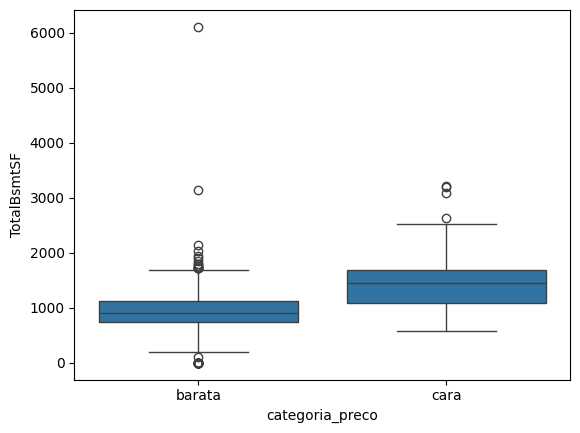

In [ ]:
# Criando o boxplot
sns.boxplot(data = df, x = "categoria_preco", y = "TotalBsmtSF")
plt.title("Preço x TotalBsmtSF");

Utilizando a variável do total da área do porão, observamos uma situação bem semelhante com as anteriores. As casas caras apresentam tanto média quanto mediana maiores, porém os boxplots estão apresentando uma sobreposição novamente, fazendo com que para a comprovação da diferença entre as médias seja necessario um teste de hipóteses.

In [ ]:
# Agrupando os dados e observando a média
df.groupby("categoria_preco")["BedroomAbvGr"].mean()

categoria_preco
barata    2.806922
cara      3.046961
Name: BedroomAbvGr, dtype: float64

In [ ]:
# Agrupando os dados e observando a média
df.groupby("categoria_preco")["BedroomAbvGr"].median()

categoria_preco
barata    3.0
cara      3.0
Name: BedroomAbvGr, dtype: float64

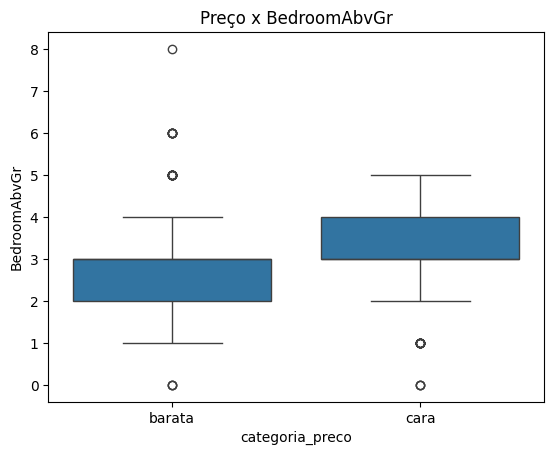

In [ ]:
# Criando o boxplot
sns.boxplot(data = df, x = "categoria_preco", y = "BedroomAbvGr")
plt.title("Preço x BedroomAbvGr");

Ao observarmos a média, chegamos a um valor muito próximo, e obtivemos uma mediana igual entre os quartos presentes nas casas caras e baratas, mostrando que ambas as casas estão bem próximas no quesito número de banheiros. Podemos perceber também a sobreposição que está ocorrendo no boxplot, o que confirma a nossa desconfiança de que estão bem semelhantes.

**Conclusão**

Ao analisar os dados fornecidos sobre as características das casas caras e baratas, observamos consistentemente que as casas caras tendem a ter médias e medianas mais elevadas em aspectos como total de cômodos, área total e tamanho do porão. No entanto, o número de quartos é bem semelhante tanto nas casas caras quanto nas casas baratas.

É evidente que existe uma sobreposição nos boxplots, indicando que algumas casas baratas compartilham características semelhantes com as casas caras.

Embora as casas caras geralmente apresentem características superiores, a sobreposição nos dados destaca a importância de uma análise mais aprofundada para compreender a diversidade dentro de cada categoria e fazer avaliações mais precisas.

#### Vamos observar mais a fundo a seguinte hipótese: **Os apartamentos mais caros são mais antigos**

In [ ]:
# Agrupando os dados e observando a média
df.groupby("categoria_preco")["YearBuilt"].mean()

categoria_preco
barata    1964.303279
cara      1992.392265
Name: YearBuilt, dtype: float64

In [ ]:
# Agrupando os dados e observando a mediana
df.groupby("categoria_preco")["YearBuilt"].median()

categoria_preco
barata    1965.5
cara      2002.0
Name: YearBuilt, dtype: float64

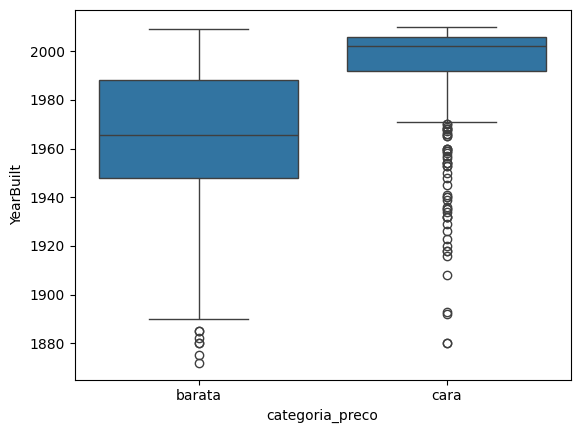

In [ ]:
# Criando o boxplot
sns.boxplot(data = df, x = "categoria_preco", y = "YearBuilt")
plt.title("Preço x YearBuilt");

**Conclusão**

As médias entre as datas de construção das casas baratas e caras estão bem semelhantes, porém a mediana está um pouco diferente, o que pode indicar que a presença de outliers está esticando a média.

Também é possível notar que a maior parte das casas caras está acima do terceiro quartil das casas baratas. Podemos observar que a maioria das casas caras foi construída acima de 1985. No entanto, devido à sobreposição, para afirmarmos que as casas novas realmente são mais caras, seria necessária a aplicação de um teste de hipótese.

#### **Correlação**

Mesmo que correlação não seja um tema que será abordado agora, vale a pena dar uma olhada para entendermos como uma variável se comporta em relação à outra.

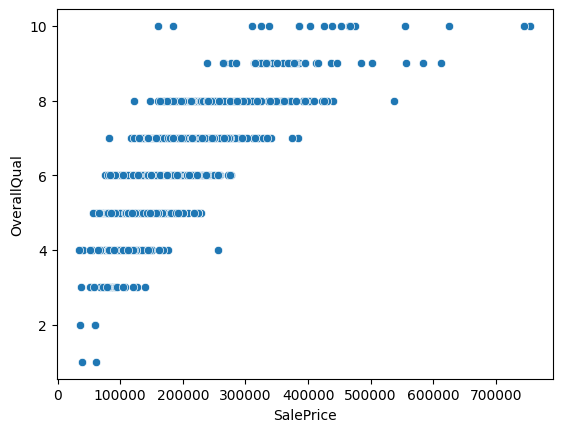

In [ ]:
# Criando o gráfico de dispersão
sns.scatterplot(data = df, x = 'SalePrice', y = 'OverallQual')
plt.title("Preço x OverallQual");

Como a variável 'OverallQual' é do tipo discreta, é possível notar que existem diversos pontos na mesma linha. É possível enxergar uma correlação, embora possivelmente seja uma correlação fraca. Aparentemente, as casas que recebem notas mais altas apresentam os maiores preços.

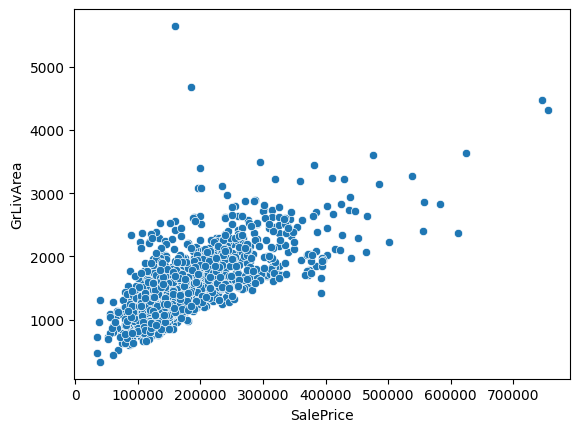

In [ ]:
# Criando o gráfico de dispersão
sns.scatterplot(data = df, x = 'SalePrice', y = 'GrLivArea')
plt.title("Preço x GrLivArea");

No caso dos preços de venda e da área, eles apresentam uma correlação que aparentemente é mais forte que a anterior, embora alguns pontos fujam bastante. Provavelmente, são aqueles casos em que casas com grandes áreas foram vendidas a baixos preços, enquanto algumas casas pequenas foram vendidas a altos preços.

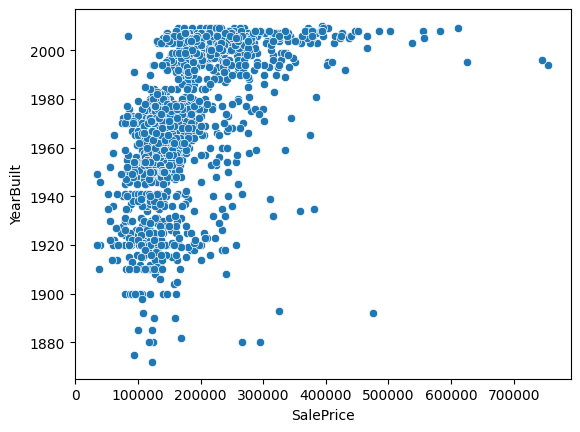

In [ ]:
# Criando o gráfico de dispersão
sns.scatterplot(data = df, x = 'SalePrice', y = 'YearBuilt')
plt.title("Preço x YearBuilt");

Já no caso dos anos em relação ao preço da casa, a visualização não ficou tão boa. Talvez, utilizando outra técnica, seja possível observar essa correlação, mas até o momento, o que conseguimos enxergar é que a maior parte das casas novas são caras. Assim, acredito que as casas mais antigas não estão apresentando um valor tão alto, logo podemos descartar a nossa hipótese.

### **Categóricos**

Vamos prosseguir com as variáveis que podem ser tratadas como categóricas. Por favor, forneça mais informações ou instruções sobre como você gostaria de proceder com essas variáveis.

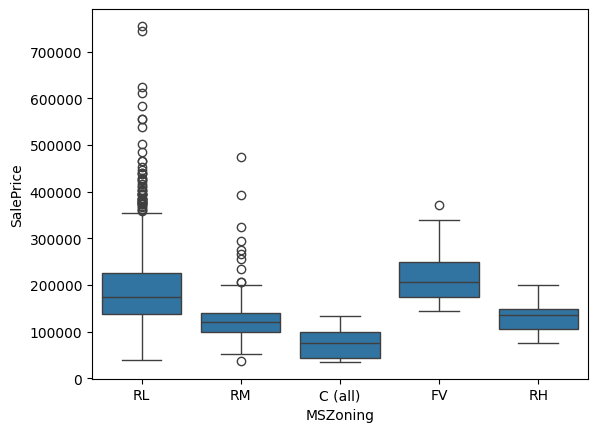

In [ ]:
# Criando o boxplot
sns.boxplot(x="MSZoning", y="SalePrice", data=df);

Quando observamos esse gráfico, onde temos a classificação das zonas da casa, podemos perceber que a única que podemos realmente afirmar que existem diferenças entre elas é a 'FV' e a 'C'. Todas as outras estão demonstrando algum tipo de sobreposição, sendo necessário a aplicação de algum teste de hipótese. Mas já podemos afirmar que as casas nas zonas 'FV' tendem a ser mais caras que as casas da zona 'C'.

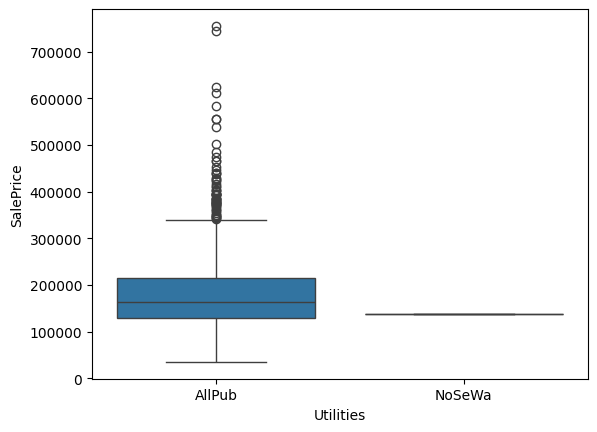

In [ ]:
# Criando o boxplot
sns.boxplot(x="Utilities", y="SalePrice", data=df);

Pode-se observar novamente um padrão de gráfico estranho. Vamos analisar um pouco mais a fundo essa coluna para entendermos melhor esse caso.

In [ ]:
# Observando os valores presentes
df['Utilities'].value_counts()

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

Pode-se observar que quase todos os dados são classificados como 'AllPub', o que indica que as casas possuem todas as utilidades públicas, como energia, água, gás, etc. Apenas uma casa apresenta a característica 'NoSeWa', onde apenas a eletricidade e o gás estão presentes. Por conseguinte, podemos afirmar que, como quase todas as casas apresentam a categoria 'AllPub', essa característica não vai nos dizer muita coisa a respeito do preço de venda das casas.

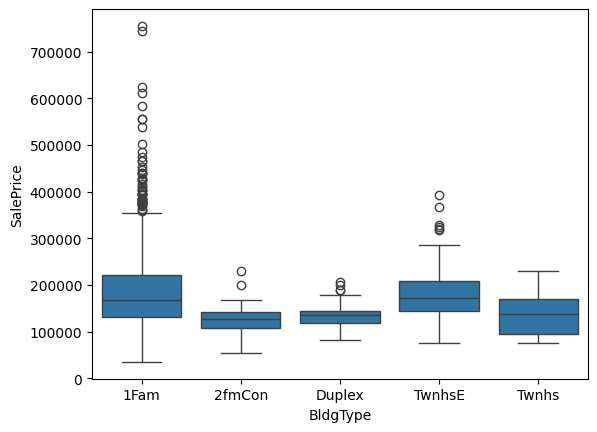

In [ ]:
# Criando o boxplot
sns.boxplot(x="BldgType", y="SalePrice", data=df);

Ao observar o gráfico de tipo de casa, aparentemente, ele não nos diz muita coisa, já que parece não existir muita diferença entre eles. Claro que, para decretarmos isso como uma certeza, seria necessário calcular a média de cada uma das categorias e, logo após, aplicar um teste de hipótese.








## **Dispersão**

Vamos entender o comportamento da variavel 'SalePrice', vamos tentar reponder as seguintes perguntas:

- 1) A distribuição é normal?

- 2) Qual é o desvio padrão da distribuição? Será que os dados variam muito?

- 3) Qual seria a curtose dessa distribuição? Com isso, conseguiremos entender se existem mais ou menos dados concentrados na cauda

- 4) Se não for normal, qual é a skew dessa distribuição? Com isso, podemos entender se a cauda é desviada mais pra direita ou esqueda

Agora vamos analisar o KPI

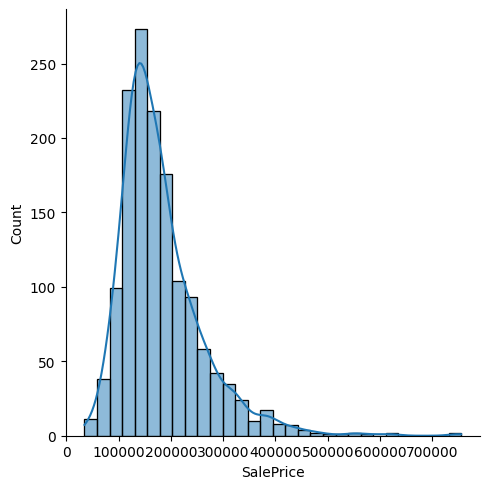

In [ ]:
# Criando o histograma
sns.displot(df['SalePrice'], kde = True, bins = 30);

Podemos observar uma longa cauda do lado direito, mostrando que temos poucos registros com valores muito altos, ou seja, outliers. Devido a essa longa cauda, podemos afirmar que essa distribuição não se trata de uma distribuição normal.

Agora vamos observar o desvio padrão.

In [ ]:
# Calculando o desvio padrão
desvio = df['SalePrice'].std()

# Exibindo o desvio
print(desvio)

79442.50288288662


Levando em consideração que a nossa média para essa coluna era de 180k, um desvio de 79k parece ser bem alto em relação à média. Vamos observar o coeficiente de variação.

Agora que sabemos o desvio padrão, vamos calcular o coeficiente de variação.

In [ ]:
# Calculando o coeficiente de variância
coef_var =  (desvio/df['SalePrice'].mean())*100

# Outra forma de realizar esse cálculo: coef_var = scipy.stats.variation(df['SalePrice']) * 100

# Exibindo o coeficiente
print(coef_var)

43.91000318780071

Dessa forma, podemos afirmar que os dados diferem da média cerca de 79.442 unidades. Essa diferença representa cerca de 43% da média.

Vamos calcular o skew para entender onde está localizada a maior parte dos nossos outliers.

In [ ]:
# Importando o skew
from scipy.stats import skew

# Verificando assimetria
skew(df['SalePrice'])

1.880940746034036

O skew está maior que um, logo não pode ser considerado normal e está positivo, indicando assim que a nossa assimetria é positiva e essa assimetria é para a direita.

## **Regressão**

Nosso intuito nessa etapa é aplicar a regressão linear para prever os preços das casas, entender os coeficientes e identificar quais são as variaveis mais importantes para a previsão


Como já fizemos previamente uma analise geral nos nossos dados vamos partir para as seguintes etapas

### **Preparando os dados**

Vamos observar se existe algum valor ausente nas nossas variáveis.

In [6]:
# Observando valores ausentes
df.isnull().sum()

Unnamed: 0      0
SalePrice       0
OverallQual     0
OverallCond     0
BedroomAbvGr    0
TotRmsAbvGrd    0
GrLivArea       0
TotalBsmtSF     0
YearBuilt       0
MSZoning        0
Utilities       0
BldgType        0
dtype: int64

Não existem valores ausentes dito isso vamos seguir.


Agora vamos criar um df copia para realizarmos as mudanças necessarias tais como:

- Exclusão da coluna 'Unnamed: 0'
- Vamos criar variaveis dummy para ajustar os valores de 'MSZoning', 'Utilities' e 'BldgType'

In [15]:
# Criando uma cópia do nosso DF
df_copy = df.copy()

# Exibindo os dados
df_copy.head()

,Unnamed: 0,SalePrice,OverallQual,OverallCond,BedroomAbvGr,TotRmsAbvGrd,GrLivArea,TotalBsmtSF,YearBuilt,MSZoning,Utilities,BldgType
0,0,208500,7,5,3,8,1710,856,2003,RL,AllPub,1Fam
1,1,181500,6,8,3,6,1262,1262,1976,RL,AllPub,1Fam
2,2,223500,7,5,3,6,1786,920,2001,RL,AllPub,1Fam
3,3,140000,7,5,3,7,1717,756,1915,RL,AllPub,1Fam
4,4,250000,8,5,4,9,2198,1145,2000,RL,AllPub,1Fam


Agora que criamos o nosso df copia vamos seguir para o ajuste das variaveis, começando pela exclusão da variavel que não iremos utilizar

In [11]:
# Excluindo a coluna que não iremos utilizar
df_copy = df_copy.drop('Unnamed: 0', axis = 1)

,SalePrice,OverallQual,OverallCond,BedroomAbvGr,TotRmsAbvGrd,GrLivArea,TotalBsmtSF,YearBuilt,MSZoning,Utilities,BldgType
0,208500,7,5,3,8,1710,856,2003,RL,AllPub,1Fam
1,181500,6,8,3,6,1262,1262,1976,RL,AllPub,1Fam
2,223500,7,5,3,6,1786,920,2001,RL,AllPub,1Fam
3,140000,7,5,3,7,1717,756,1915,RL,AllPub,1Fam
4,250000,8,5,4,9,2198,1145,2000,RL,AllPub,1Fam


Agora que realizamos as devidas exclusões vamos realizar a 'dummyficação'

In [16]:
# Criando as variáveis dummy e forçando o tipo para inteiros
dummies_zoning = pd.get_dummies(df_copy['MSZoning'], drop_first=True, dtype=int).rename(columns=lambda x: 'Zoning_' + str(x))

# Criando as variáveis dummy e forçando o tipo para inteiros
dummies_utilities = pd.get_dummies(df_copy['Utilities'], drop_first=True, dtype=int).rename(columns=lambda x: 'Utilities_' + str(x))

# Criando as variáveis dummy e forçando o tipo para inteiros
dummies_type = pd.get_dummies(df_copy['BldgType'], drop_first=True, dtype=int).rename(columns=lambda x: 'Type_' + str(x))

# Aplicando no df_copy
df_copy = pd.concat([df_copy, dummies_zoning, dummies_utilities, dummies_type], axis=1)

# Exibindo o valor
df_copy.head()

,Unnamed: 0,SalePrice,OverallQual,OverallCond,BedroomAbvGr,TotRmsAbvGrd,GrLivArea,TotalBsmtSF,YearBuilt,MSZoning,...,BldgType,Zoning_FV,Zoning_RH,Zoning_RL,Zoning_RM,Utilities_NoSeWa,Type_2fmCon,Type_Duplex,Type_Twnhs,Type_TwnhsE
0,0,208500,7,5,3,8,1710,856,2003,RL,...,1Fam,0,0,1,0,0,0,0,0,0
1,1,181500,6,8,3,6,1262,1262,1976,RL,...,1Fam,0,0,1,0,0,0,0,0,0
2,2,223500,7,5,3,6,1786,920,2001,RL,...,1Fam,0,0,1,0,0,0,0,0,0
3,3,140000,7,5,3,7,1717,756,1915,RL,...,1Fam,0,0,1,0,0,0,0,0,0
4,4,250000,8,5,4,9,2198,1145,2000,RL,...,1Fam,0,0,1,0,0,0,0,0,0


Agora que realizamos esses ajustas nas colunas vamos observar a correlação entre as variveis

In [33]:
# Calcular a correlação entre variáveis específicas
correlacao = df_copy[['SalePrice', 'OverallQual', 'OverallCond', 'BedroomAbvGr', 'TotRmsAbvGrd', 'GrLivArea', 'TotalBsmtSF', 'YearBuilt']].corr()

# Exibindo as correlações
correlacao.head(1)

,SalePrice,OverallQual,OverallCond,BedroomAbvGr,TotRmsAbvGrd,GrLivArea,TotalBsmtSF,YearBuilt
SalePrice,1.0,0.790982,-0.077856,0.168213,0.533723,0.708624,0.613581,0.522897


Dessa forma podemos observar que as variaveis OveraallQual, GrLivArea e TotalBsmtSF apresentaram uma correlação positiva forte, já as variaveis YearBuilt e TotRmsAbvGrd apresentaram uma correlação positiva media enquanto a varaivel BedroomAbvGr apresentou uma correlação fraca e OverallCond apresentou uma correlação negativa. Observando as correlações poderemos selecionar quais as variaveis indepedentes numericas iremos utilizar no nosso modelo, dito isso vamos seguir adiante

### **Divisão dos dados**

Vamos dividir nossos dados, separando as variáveis independentes da variável dependente.

In [7]:
# Variáveis independentes
X = df_copy[['OverallQual', 'GrLivArea', 'TotalBsmtSF', 'TotRmsAbvGrd', 'YearBuilt']]

# Variável dependete
y = df_copy['SalePrice']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    1460 non-null   int64 
 1   SalePrice     1460 non-null   int64 
 2   OverallQual   1460 non-null   int64 
 3   OverallCond   1460 non-null   int64 
 4   BedroomAbvGr  1460 non-null   int64 
 5   TotRmsAbvGrd  1460 non-null   int64 
 6   GrLivArea     1460 non-null   int64 
 7   TotalBsmtSF   1460 non-null   int64 
 8   YearBuilt     1460 non-null   int64 
 9   MSZoning      1460 non-null   object
 10  Utilities     1460 non-null   object
 11  BldgType      1460 non-null   object
dtypes: int64(9), object(3)
memory usage: 137.0+ KB
